In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Mínimos con regularización

Garantizando que la matríz $\tilde\phi^T.\tilde\phi$ tenga inversa, se procura incluir un parámetro alpha de valor muy pequeño $0<\alpha<1$ de tal forma que los autovalores de esta matriz no sean cero. Por tanto:

$$\theta_{WLS} = \tilde{\phi^+}.\tilde{y_N}$$

Se reescribe así:

$$\theta_{WLS} = (\tilde{\phi^T}.\tilde{\phi}+\alpha.I)^-1.\tilde{\phi}^T.y_N$$


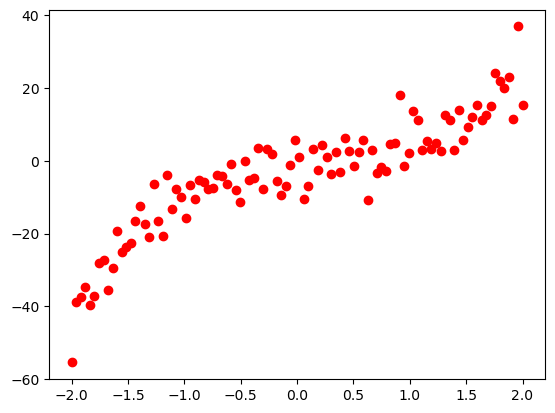

In [4]:
## Generando los valores medidos a partir 
## de un valor ideal contaminado por ruido
t = np.linspace([-2],[2],100)

pol = [3,-2,4.6,-1.8]
y = np.polyval(pol,t) 

r = 5
yn = y + np.random.normal(0,r,t.shape)
plt.scatter(t,yn,color = 'red')

In [7]:
## Definiendo el orden deseado si es un modelo polinomial
orden = 2
phi = (t**0)
#Creación del vector phi
for n in range(1,orden+1):
    phi = np.concatenate((t**n, phi), axis=1)

#phi = np.concatenate((t**0, phi),axis=1)
phi

array([[ 4.00000000e+00, -2.00000000e+00,  1.00000000e+00],
       [ 3.84001632e+00, -1.95959596e+00,  1.00000000e+00],
       [ 3.68329762e+00, -1.91919192e+00,  1.00000000e+00],
       [ 3.52984389e+00, -1.87878788e+00,  1.00000000e+00],
       [ 3.37965514e+00, -1.83838384e+00,  1.00000000e+00],
       [ 3.23273135e+00, -1.79797980e+00,  1.00000000e+00],
       [ 3.08907254e+00, -1.75757576e+00,  1.00000000e+00],
       [ 2.94867871e+00, -1.71717172e+00,  1.00000000e+00],
       [ 2.81154984e+00, -1.67676768e+00,  1.00000000e+00],
       [ 2.67768595e+00, -1.63636364e+00,  1.00000000e+00],
       [ 2.54708703e+00, -1.59595960e+00,  1.00000000e+00],
       [ 2.41975309e+00, -1.55555556e+00,  1.00000000e+00],
       [ 2.29568411e+00, -1.51515152e+00,  1.00000000e+00],
       [ 2.17488011e+00, -1.47474747e+00,  1.00000000e+00],
       [ 2.05734109e+00, -1.43434343e+00,  1.00000000e+00],
       [ 1.94306703e+00, -1.39393939e+00,  1.00000000e+00],
       [ 1.83205795e+00, -1.35353535e+00

In [10]:
#Valor de regularización
alpha = 0.01        
A = np.dot(phi.T,phi)+alpha*np.eye(orden+1)
p_estimado = np.dot(np.linalg.inv(A),np.dot(phi.T,yn))
y_estimado = np.polyval(p_estimado,t)
p_estimado

array([[-2.08378433],
       [11.85669841],
       [-1.0116274 ]])

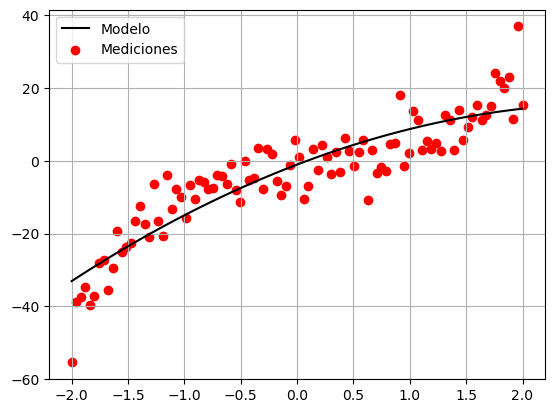

In [11]:
plt.plot(t,y_estimado,color = 'black')
plt.scatter(t,yn,color = 'red')
plt.legend(['Modelo','Mediciones'])
plt.grid()

In [53]:
## Ecuación estimada 
cad = '';
for n in range(0,orden+1):
    cad = cad+str(p_estimado[n])+'t^'+str(orden-n)+'+'

ECM = np.sqrt(np.dot((yn-y_estimado).T , (yn-y_estimado))/len(t))
cadECM

('[1.35963777]t^3+[-4.39770962]t^2+[0.37850685]t^1+[2.54596809]t^0+',
 array([[11.51197488]]))